In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading bookings dataset
bookings = pd.read_csv("Bookings.csv")
bookings

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [3]:
#Checking first 5 rows
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [4]:
bookings.shape

(339, 13)

### **The bookings dataset has 339 rows and 13 columns.**

In [5]:
#Checking info
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [8]:
#Statistical summary for categorical values
bookings.describe(include = 'O')

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,service_name
count,339,339,339,339,339,339,339,339,339
unique,306,339,38,1,95,23,339,5,3
top,customer_97,booking_82,Gurgaon,India,Frankfurt am Main,India,2020-02-05T16:12:08Z,Desktop,GOIBIBO
freq,4,1,136,339,49,125,1,142,186


In [9]:
#Statistical summary numerical values
bookings.describe()

,INR_Amount,no_of_passengers,days_to_departure,distance_km
count,339.000000,339.000000,339.000000,339.000000
mean,29327.460708,1.247788,22.348083,4574.309735
std,28148.851152,0.557854,36.412208,3119.033980
min,1402.400000,1.000000,0.000000,206.800000
25%,7237.530000,1.000000,3.000000,1125.800000
50%,23209.600000,1.000000,9.000000,6059.100000
75%,39669.200000,1.000000,24.500000,6867.850000
max,216646.400000,4.000000,311.000000,16520.300000


In [10]:
#Loading sessions dataset
sessions = pd.read_csv("Sessions.csv")
sessions

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [11]:
#Checking first 5 rows
sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [12]:
sessions.shape

(1497, 5)

### **The sessions dataset has 1497 rows and 5 columns.**

In [13]:
#Checking info
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [14]:
#Statistical Summary for categorical values
sessions.describe(include = 'O')

,session_id,search_id,search_time,session_starting_time,booking_id
count,1497,1497,1497,1497,366
unique,331,1360,1357,333,338
top,session_118,search_569,2020-05-20T13:42:32Z,2018-10-11T12:38:29.186Z,booking_63
freq,70,8,8,70,2


# **Data Analysis**

## **Q1. Find the number of distinct bookings, sessions and searches from the given data sets.**

In [15]:
x_bookings = bookings['booking_id'].nunique()
y_sessions = sessions['session_id'].nunique()
z_search = sessions['search_id'].nunique()

print("No. of distinct bookings:", x_bookings)
print("No. of distinct sessions:", y_sessions)
print("No. of distinct searches:", z_search)

No. of distinct bookings: 339
No. of distinct sessions: 331
No. of distinct searches: 1360


## **Q2. How many sessions have more than one booking?**

In [16]:
bookings_per_session = sessions.groupby(['session_id']).agg({'booking_id':'nunique'}).reset_index().rename(columns={'booking_id':'No_of_bookings'})
print("No. of bookings in all sessions: \n\n", bookings_per_session)

No. of bookings in all sessions: 

       session_id  No_of_bookings
0      session_0               1
1      session_1               1
2     session_10               1
3    session_100               1
4    session_101               1
..           ...             ...
326   session_95               1
327   session_96               1
328   session_97               1
329   session_98               1
330   session_99               1

[331 rows x 2 columns]


In [17]:
sessions_with_more_than_1_booking = bookings_per_session[bookings_per_session['No_of_bookings']>1]
print("No. of sessions having more than one booking: \n\n", sessions_with_more_than_1_booking)

No. of sessions having more than one booking: 

       session_id  No_of_bookings
40   session_134               2
62   session_154               2
108  session_196               2
148  session_231               2
190   session_27               2
213  session_290               2
221  session_298               2
251  session_324               2
277   session_50               2
305   session_76               2


In [18]:
print("No. of sessions having more than one booking:", bookings_per_session[bookings_per_session['No_of_bookings']>1].shape[0])

No. of sessions having more than one booking: 10


## **Q3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?**

In [19]:
#Converting dtype of booking_time from object to datetime
day_to_datetime = pd.to_datetime(bookings["booking_time"])
day_to_datetime

,booking_time
0,2020-02-05 16:12:08+00:00
1,2018-11-21 08:21:47+00:00
2,2019-12-16 22:54:58+00:00
3,2021-10-29 12:25:38+00:00
4,2020-08-11 16:09:10+00:00
...,...
334,2020-02-14 14:20:20+00:00
335,2020-03-21 06:40:56+00:00
336,2020-01-31 20:35:35+00:00
337,2018-10-11 14:31:28+00:00


In [20]:
#Checking data type of booking_time
day_to_datetime.dtype

datetime64[ns, UTC]

In [21]:
# Extracting day of the week (0=Monday, 6=Sunday)
day_of_week = day_to_datetime.dt.day_name()
day_of_week

,booking_time
0,Wednesday
1,Wednesday
2,Monday
3,Friday
4,Tuesday
...,...
334,Friday
335,Saturday
336,Friday
337,Thursday


In [22]:
#Change the Series name:
day_of_week.name = 'Weekdays'

#Converting series into a DataFrame with a renamed column:
day_of_week = day_of_week.to_frame(name='Weekdays')
day_of_week

,Weekdays
0,Wednesday
1,Wednesday
2,Monday
3,Friday
4,Tuesday
...,...
334,Friday
335,Saturday
336,Friday
337,Thursday


In [23]:
# Count bookings per day of the week
bookings_per_day = day_of_week.value_counts()
bookings_per_day

,count
Weekdays,
Thursday,65
Tuesday,59
Friday,51
Monday,51
Saturday,44
Sunday,35
Wednesday,34


In [24]:
#Finding the highest no of bookings
maximum_no_of_bookings = bookings_per_day.max()
print('The maximum no. of bookings:', maximum_no_of_bookings)

The maximum no. of bookings: 65


### **The maximum number of booking is on Thursday which is 65.**

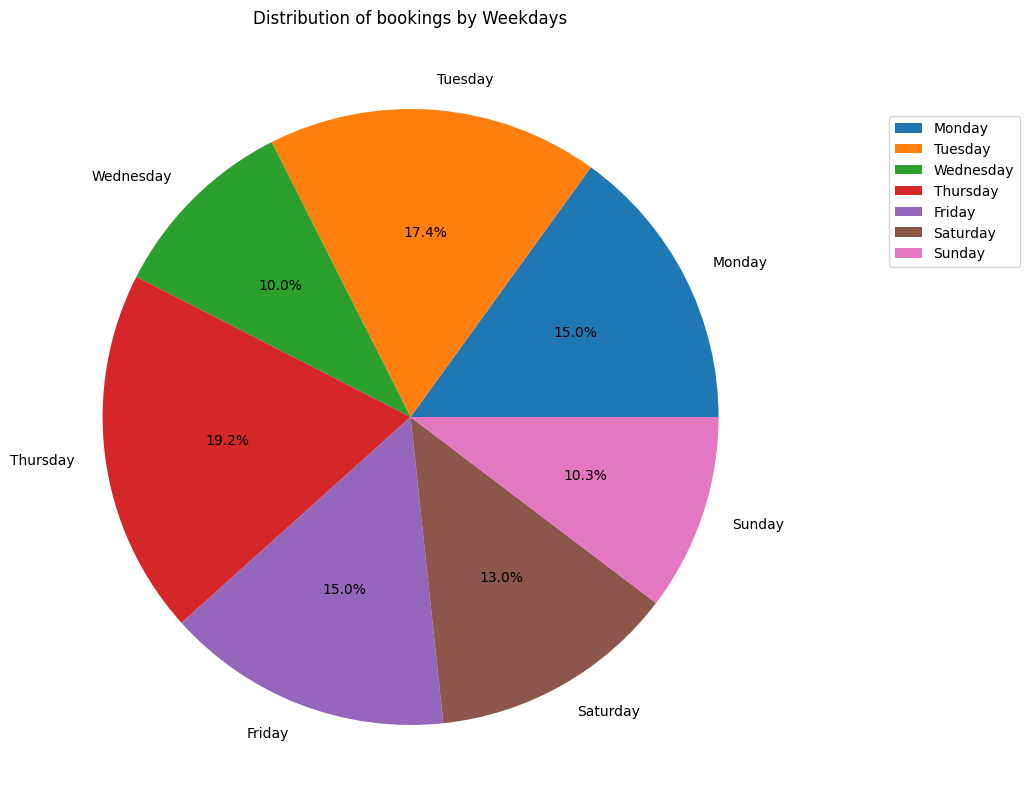

In [25]:
#Setting the size
plt.figure(figsize=(10,10))

#Defining the column names
Weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts = [51, 59, 34, 65, 51, 44, 35]

#Plotting pie chart
plt.pie(Counts, labels = Weekdays, autopct = '%1.1f%%')

#Adding legends & title
plt.legend(loc = 'upper right', bbox_to_anchor = (1.3, 0.9))
plt.title('Distribution of bookings by Weekdays')

#Printing pie chart
plt.show()

## **Q4. For each of the service names, display the total number of bookings and the total Gross Bokking Value in INR.**

In [26]:
#Grouping and counting the values
total_count = bookings.groupby(['service_name']).agg(Total_No_of_bookings = ('booking_id','count'),
                                                     Total_Gross_Booking_Value_INR = ('INR_Amount','sum'))
total_count

,Total_No_of_bookings,Total_Gross_Booking_Value_INR
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


## **Q5. For customers who have more than 1 booking which is the most booked route(from_city to to_city)?**

In [27]:
#Finding no. of bookings
no_of_bookings = bookings.groupby(['customer_id']).agg({'booking_id':'nunique'}).reset_index().rename(columns={'booking_id':'No_of_bookings'})
print('No of bookings by each customer: \n\n', no_of_bookings)

No of bookings by each customer: 

       customer_id  No_of_bookings
0      customer_0               1
1      customer_1               1
2     customer_10               1
3    customer_100               1
4    customer_101               1
..            ...             ...
301   customer_95               1
302   customer_96               1
303   customer_97               4
304   customer_98               1
305   customer_99               1

[306 rows x 2 columns]


In [28]:
#Identifying customers with more than 1 booking
customers_with_multiple_bookings = no_of_bookings[no_of_bookings['No_of_bookings']>1]
print('No. of customers with more than one booking: \n\n', customers_with_multiple_bookings)

No. of customers with more than one booking: 

       customer_id  No_of_bookings
25   customer_120               2
43   customer_137               2
51   customer_144               2
63   customer_155               2
69   customer_160               3
86   customer_176               3
89   customer_179               2
114  customer_200               2
132  customer_217               3
147  customer_230               3
152  customer_235               2
154  customer_237               2
163  customer_245               2
164  customer_246               3
165  customer_247               2
174  customer_255               2
185  customer_265               2
201   customer_28               2
204  customer_282               2
220  customer_297               2
233   customer_33               2
245   customer_44               2
250   customer_49               2
270   customer_67               2
299   customer_93               2
303   customer_97               4


In [29]:
#Creating a new column 'from_city_to_city'
bookings['from_city_to_city'] = bookings['from_city'] + ' to ' + bookings['to_city']
bookings['from_city_to_city']

,from_city_to_city
0,Gurgaon to Ahmedabad
1,Delhi to Brussels
2,Devanhalli to Frankfurt am Main
3,Gurgaon to Frankfurt am Main
4,Gurgaon to Roissy-en-France
...,...
334,Gurgaon to Rāja Sānsi
335,Gurgaon to Bhubaneswar
336,Gurgaon to Birmingham
337,Mumbai to Kloten


In [30]:
#Checking first 5 rows
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,from_city_to_city
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,Gurgaon to Ahmedabad
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,Delhi to Brussels
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,Devanhalli to Frankfurt am Main
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,Gurgaon to Frankfurt am Main
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,Gurgaon to Roissy-en-France


In [31]:
bookings.shape

(339, 14)

### **The bookings dataset has 339 rows & 14 shapes.**

In [32]:
#Filtering bookings based on customers with multiple bookings
bookings1 = bookings[bookings['customer_id'].isin(customers_with_multiple_bookings['customer_id'])]
print("List of customers & routes booked: \n\n", bookings1[['customer_id', 'from_city_to_city']])

List of customers & routes booked: 

       customer_id                 from_city_to_city
6     customer_28                Kolkata to Gurgaon
7    customer_217            Bhubaneswar to Durlaga
13   customer_282                  Indore to Mumbai
16   customer_179             Gurgaon to Port Blair
24   customer_179                  Mumbai to Jaipur
29   customer_247              Gurgaon to Fiumicino
42   customer_137             Gurgaon to Birmingham
48    customer_49       Gurgaon to Roissy-en-France
55   customer_245                    Pune to Nagpur
65   customer_246                    Delhi to Paris
80    customer_97             Dharamsala to Gurgaon
81   customer_176                 Barelā to Gurgaon
85   customer_155                    Jaipur to Agra
89    customer_44             Gurgaon to Rāja Sānsi
100  customer_282                Mumbai to Chicalim
101   customer_97                      Delhi to Yol
109  customer_297                Gurgaon to Tiruchi
111  customer_144         

In [33]:
#Counting the frequency of routes
route_counts = bookings1.groupby(['from_city_to_city']).agg(Counts = ('from_city_to_city','count'))
print('Counts of routes: \n\n', route_counts)

Counts of routes: 

                                   Counts
from_city_to_city                       
Ahmedabad to Gwalior                   1
Barelā to Gurgaon                      1
Bhubaneswar to Durlaga                 1
Bikaner to Gurgaon                     1
Bālāpur to Düsseldorf                  2
Delhi to Jammu                         1
Delhi to Paris                         1
Delhi to Varanasi                      1
Delhi to Yol                           1
Devanhalli to Gurgaon                  2
Dharamsala to Gurgaon                  1
Durlaga to Bhubaneswar                 2
Gurgaon to Bagdogra                    2
Gurgaon to Barelā                      1
Gurgaon to Berlin                      1
Gurgaon to Bhubaneswar                 2
Gurgaon to Birmingham                  1
Gurgaon to Dharamsala                  1
Gurgaon to Fiumicino                   1
Gurgaon to Frankfurt am Main           1
Gurgaon to Hamburg                     1
Gurgaon to Lisbon                   

In [34]:
max_route = route_counts.loc[route_counts['Counts'].idxmax()]
print('The most booked route is:', max_route)

The most booked route is: Counts    5
Name: Gurgaon to Roissy-en-France, dtype: int64


### **The most booked route is Gurgaon to Roissy-en-France.**

## **Q6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?**

In [35]:
#Counting no of departure per city
departure_count = bookings.groupby(['from_city']).agg(Counts = ('from_city','count')).reset_index()
print('No. of departures per city: \n\n', departure_count)

No. of departures per city: 

              from_city  Counts
0             Agartala       1
1            Ahmedabad       8
2             Angamāli       2
3            Bangalore       2
4               Barelā       1
5          Bhubaneswar       2
6              Bikaner       1
7              Bālāpur       6
8              Chennai      16
9             Chicalim       2
10               Delhi      29
11          Devanhalli      24
12          Dharamsala       1
13             Durlaga       2
14              Ferokh       1
15          Gannavaram       1
16             Gurgaon     136
17           Hyderabad       4
18           Hyderābād       1
19              Indore       1
20              Jaipur       4
21               Jammu       1
22               Kochi       4
23             Kolkata       2
24             Lucknow       1
25         Madhyamgram       6
26              Mohali       1
27              Mumbai      34
28              Nagpur       1
29           New Delhi       7
30      

In [36]:
#Filtering cities with at least 5 departures
valid_cities = departure_count[departure_count['Counts']>=5]
print('Cities with at least 5 departures: \n\n', valid_cities)

Cities with at least 5 departures: 

       from_city  Counts
1     Ahmedabad       8
7       Bālāpur       6
8       Chennai      16
10        Delhi      29
11   Devanhalli      24
16      Gurgaon     136
25  Madhyamgram       6
27       Mumbai      34
29    New Delhi       7
33   Rāja Sānsi      17


In [37]:
#Filtering top 3 cities
top_3_cities = valid_cities.sort_values(by = 'Counts', ascending = False).head(3)
print('The top 3 departure cities are : \n\n', top_3_cities)

The top 3 departure cities are : 

    from_city  Counts
16   Gurgaon     136
27    Mumbai      34
10     Delhi      29


### **The top 3 departure cities where customer's book mostly in advance are Gurgaon, Mumbai and Delhi.**

## **Q7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correalation?**

In [38]:
#Dropping numerical columns from booking dataset
df = bookings.drop(['customer_id', 'booking_id', 'from_city',	'from_country',	'to_city',
                    'to_country', 'booking_time', 'device_type_used', 'service_name', 'from_city_to_city'], axis = 1)
df

,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2565.28,1.0,10.0,747.8
1,23120.00,1.0,1.0,6701.5
2,25717.60,1.0,32.0,7712.0
3,135969.60,2.0,69.0,6112.5
4,31791.20,1.0,3.0,6570.4
...,...,...,...,...
334,2721.60,1.0,26.0,421.0
335,6552.00,1.0,0.0,1274.7
336,126502.46,2.0,109.0,7190.9
337,55152.80,2.0,22.0,6760.0


In [39]:
#Checking first 5 rows
df.head()

,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2565.28,1.0,10.0,747.8
1,23120.00,1.0,1.0,6701.5
2,25717.60,1.0,32.0,7712.0
3,135969.60,2.0,69.0,6112.5
4,31791.20,1.0,3.0,6570.4


In [40]:
df.shape

(339, 4)

### **The df dataset has 339 rows & 5 columns.**

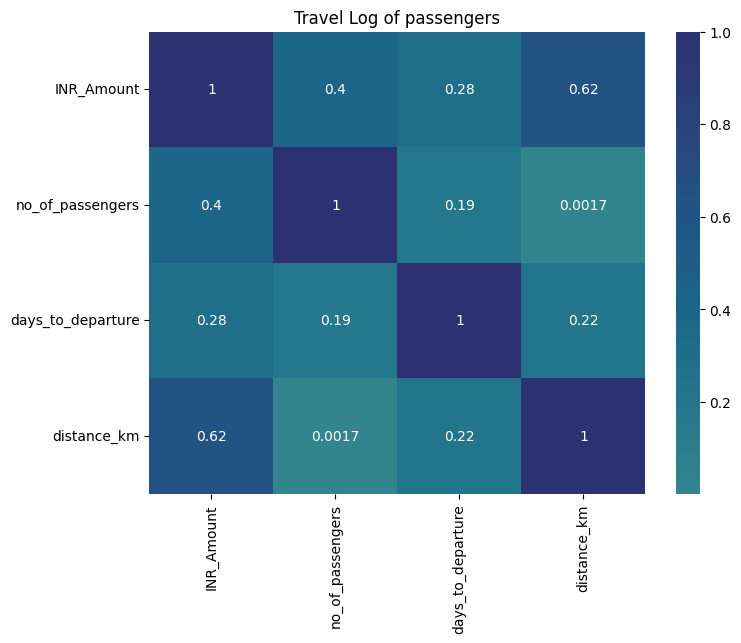

In [41]:
#Setting the fig size
plt.subplots(figsize=(8,6))


#Plotting heatmap
heat_map = sns.heatmap(df.corr(), center = 0, cmap = 'crest', annot = True)
heat_map.set_title('Travel Log of passengers')

#Printing heatmap
plt.show()

### **The correlation of INR_Amount and distance_km is 0.62 which is maximum .**

## **Q8. For each service, which is the most used device type for making bookings on the platform?**

---



In [42]:
#Grouping by service name & device type and then counting it
device_count = bookings.groupby(['service_name', 'device_type_used']).agg(Counts = ('device_type_used', 'count'))
device_count

Counts
service_name device_type_used        
GOIBIBO      Android               44
             Desktop               61
             IOS                   70
             MobileWeb             11
MMT          Android                8
             Desktop               30
             IOS                    5
             MobileWeb              5
YATRA        Android               18
             Desktop               51
             IOS                   22
             MobileWeb             11
             Tablet                 3

In [43]:
#Finding the most used device type for each services
most_used_devices = device_count.loc[device_count.groupby('service_name')['Counts'].idxmax()]
most_used_devices

,,Counts
service_name,device_type_used,
GOIBIBO,IOS,70
MMT,Desktop,30
YATRA,Desktop,51


### **The most used device type for GOIBIBO is IOS whose count is 70, MMT is Desktop whose count is 30 and YATRA is Desktop whose count is 51.**

## **Q9. Plot the trends at a quartely frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.**

In [44]:
#Create a DataFrame
df1 = pd.DataFrame(bookings)
df1.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,from_city_to_city
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,Gurgaon to Ahmedabad
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,Delhi to Brussels
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,Devanhalli to Frankfurt am Main
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,Gurgaon to Frankfurt am Main
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,Gurgaon to Roissy-en-France


In [45]:
#Changing data type of booking_time
df1['booking_time'] = pd.to_datetime(df1['booking_time'])
df1['booking_time'].dtypes

datetime64[ns, UTC]

In [46]:
#Setting bookingtime as index
df1.set_index('booking_time', inplace = True)
df1.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,from_city_to_city
booking_time,,,,,,,,,,,,,
2020-02-05 16:12:08+00:00,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,Desktop,2565.28,MMT,1.0,10.0,747.8,Gurgaon to Ahmedabad
2018-11-21 08:21:47+00:00,customer_303,booking_156,Delhi,India,Brussels,Belgium,Android,23120.00,YATRA,1.0,1.0,6701.5,Delhi to Brussels
2019-12-16 22:54:58+00:00,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,Android,25717.60,YATRA,1.0,32.0,7712.0,Devanhalli to Frankfurt am Main
2021-10-29 12:25:38+00:00,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,Gurgaon to Frankfurt am Main
2020-08-11 16:09:10+00:00,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,Gurgaon to Roissy-en-France


In [48]:
#Grouping by device type & resample to quarterly frequency
quarterly_bookings = df1.groupby('device_type_used').resample('QE')['booking_id'].count()
quarterly_bookings

device_type_used  booking_time             
Android           2018-09-30 00:00:00+00:00    3
                  2018-12-31 00:00:00+00:00    3
                  2019-03-31 00:00:00+00:00    0
                  2019-06-30 00:00:00+00:00    0
                  2019-09-30 00:00:00+00:00    3
                                              ..
MobileWeb         2022-06-30 00:00:00+00:00    1
Tablet            2018-09-30 00:00:00+00:00    1
                  2018-12-31 00:00:00+00:00    1
                  2019-03-31 00:00:00+00:00    0
                  2019-06-30 00:00:00+00:00    1
Name: booking_id, Length: 69, dtype: int64

In [49]:
#Unstack the DataFrame for easier plotting
quarterly_bookings = quarterly_bookings.unstack(level = 0)
quarterly_bookings

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
booking_time,,,,,
2018-09-30 00:00:00+00:00,3.0,6.0,NaN,2.0,1.0
2018-12-31 00:00:00+00:00,3.0,22.0,4.0,4.0,1.0
2019-03-31 00:00:00+00:00,0.0,1.0,0.0,0.0,0.0
2019-06-30 00:00:00+00:00,0.0,1.0,0.0,0.0,1.0
2019-09-30 00:00:00+00:00,3.0,7.0,4.0,0.0,NaN
2019-12-31 00:00:00+00:00,14.0,15.0,14.0,0.0,NaN
2020-03-31 00:00:00+00:00,19.0,29.0,25.0,10.0,NaN
2020-06-30 00:00:00+00:00,2.0,0.0,0.0,0.0,NaN
2020-09-30 00:00:00+00:00,3.0,0.0,4.0,0.0,NaN


<Figure size 1500x600 with 0 Axes>

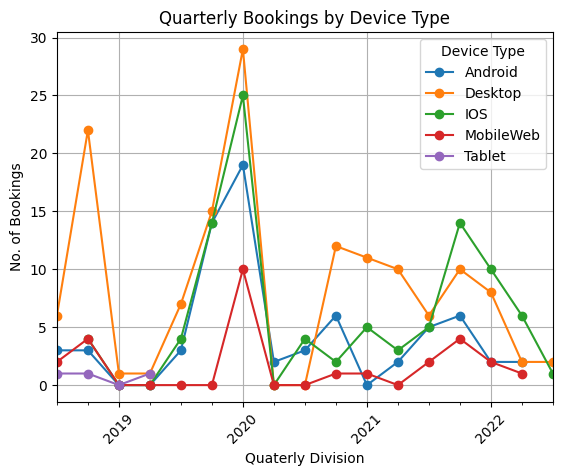

In [50]:
#Time series analysis
plt.figure(figsize=(15,6))

#Plotting time series
quarterly_bookings.plot(kind = 'line', marker = 'o', )
plt.xlabel('Quaterly Division')
plt.ylabel('No. of Bookings')
plt.title('Quarterly Bookings by Device Type')
plt.legend(title = 'Device Type')
plt.xticks(rotation = 45)
plt.grid()

#Printing time series
plt.show()

## **Q10. Consider the following example: 12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.**
##**Searches=100, bookings=10, customers=12**
##**The overall booking to search ratio, Ober, is 10/100=0.1. Using the above information/context, answer the following:**

##**A. What is the average oBSR for each month of the year?**
##**B. What is the average oBSR for each day of the week?**
##**C. Plot a time series of oBSR on all the given dates.**

In [51]:
#Merging the datset
merged_df = pd.merge(sessions, bookings, on='booking_id', how='left')
merged_df.head()

,session_id,search_id,search_time,session_starting_time,booking_id,customer_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,from_city_to_city
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
merged_df.shape

(1497, 18)



### **The merged_df datset has 1497 rows and 18 columns.**

In [53]:
#Checking info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   session_id             1497 non-null   object 
 1   search_id              1497 non-null   object 
 2   search_time            1497 non-null   object 
 3   session_starting_time  1497 non-null   object 
 4   booking_id             366 non-null    object 
 5   customer_id            366 non-null    object 
 6   from_city              366 non-null    object 
 7   from_country           366 non-null    object 
 8   to_city                366 non-null    object 
 9   to_country             366 non-null    object 
 10  booking_time           366 non-null    object 
 11  device_type_used       366 non-null    object 
 12  INR_Amount             366 non-null    float64
 13  service_name           366 non-null    object 
 14  no_of_passengers       366 non-null    float64
 15  days

In [54]:
#Converting data type from object to datetime
merged_df['search_time']=pd.to_datetime(merged_df['search_time'], format = 'mixed')
merged_df['search_time'].dtypes

datetime64[ns, UTC]

In [55]:
#Exctracting date from search_date
merged_df['search_date']=merged_df['search_time'].dt.date
merged_df['search_date']

,search_date
0,2020-01-21
1,2020-01-21
2,2020-01-21
3,2020-01-21
4,2020-01-21
...,...
1492,2018-12-18
1493,2021-12-23
1494,2021-12-23
1495,2018-12-18


In [56]:
#Exctracting day name
merged_df['search_day_of_week']=merged_df['search_time'].dt.day_name()
merged_df['search_day_of_week']

,search_day_of_week
0,Tuesday
1,Tuesday
2,Tuesday
3,Tuesday
4,Tuesday
...,...
1492,Tuesday
1493,Thursday
1494,Thursday
1495,Tuesday


In [57]:
#Grouping by date and counting bookings, searches & customers
grouped_info=merged_df.groupby(['search_date']).agg({'booking_id':'nunique', 'search_id':"nunique", 'customer_id':'nunique'}).reset_index()

grouped_info.columns=['date','num_bookings','num_searches','num_customers']

grouped_info.head()

,date,num_bookings,num_searches,num_customers
0,2018-09-04,1,3,1
1,2018-09-11,2,2,2
2,2018-09-21,2,5,2
3,2018-09-23,1,1,1
4,2018-09-24,1,3,1


In [58]:
#Calculating booking to search ratio
grouped_info['oBSR']=grouped_info['num_bookings']/grouped_info['num_searches']

#Converting data type from object to datetime
grouped_info.date=pd.to_datetime(grouped_info.date)

#Extracting day name from date
grouped_info['day_of_week']=grouped_info['date'].dt.day_name()

#Extracting month from date
grouped_info['month_of_year']=grouped_info['date'].dt.month_name()
grouped_info.head()

,date,num_bookings,num_searches,num_customers,oBSR,day_of_week,month_of_year
0,2018-09-04,1,3,1,0.333333,Tuesday,September
1,2018-09-11,2,2,2,1.000000,Tuesday,September
2,2018-09-21,2,5,2,0.400000,Friday,September
3,2018-09-23,1,1,1,1.000000,Sunday,September
4,2018-09-24,1,3,1,0.333333,Monday,September


## **A. What is the average of oBSR for each month of year ?**

In [59]:
#Grouping by month & finding mean
print(grouped_info.groupby('month_of_year')['oBSR'].mean().sort_values())

month_of_year
July         0.338445
January      0.453332
April        0.475694
December     0.491636
August       0.494246
March        0.497793
October      0.499201
February     0.547818
November     0.550523
May          0.585714
September    0.644464
June         0.683761
Name: oBSR, dtype: float64


## **B. What is the average oBSR for each day of the week?**

In [60]:
#Grouping by day of the week & finding mean
print(grouped_info.groupby('day_of_week')['oBSR'].mean().sort_values())

day_of_week
Wednesday    0.443773
Friday       0.490500
Thursday     0.517743
Sunday       0.521438
Monday       0.527127
Saturday     0.555724
Tuesday      0.582594
Name: oBSR, dtype: float64


## **C. Plot a time series of oBSR on all the given date.**

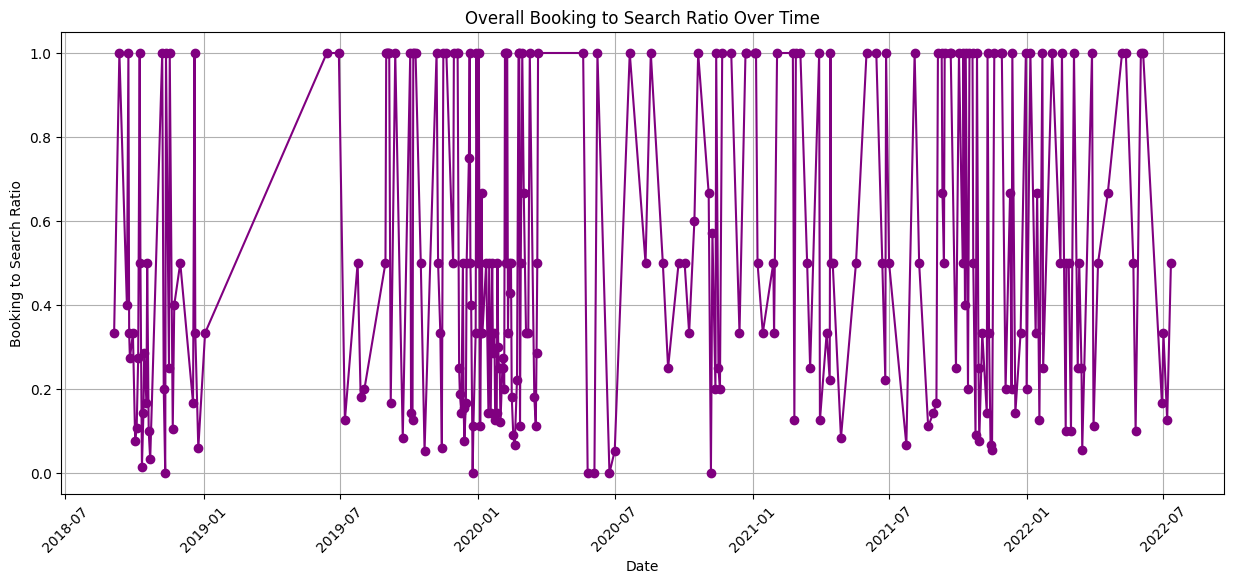

In [61]:
#Setting fig size
plt.figure(figsize=(15,6))

#Plotting time series
plt.plot(grouped_info['date'], grouped_info['oBSR'], marker = 'o', color = 'purple')
plt.xlabel('Date')
plt.ylabel('Booking to Search Ratio')
plt.title('Overall Booking to Search Ratio Over Time')
plt.xticks(rotation = 45)
plt.grid()

#Printing time series
plt.show()

# **ThankYou**